# Get updates from Rachel

In [2]:
!cp ../rmcclure/procedure.py .

# Checking how much sim has ran so far

In [9]:
times=np.genfromtxt(path+'times.txt',dtype='str')
print("Total snapshots present is",len(times))
snapshot_start=0
snapshot_end=len(times)

Total snapshots present is 778


In [14]:
print(int(778/8))
print(778/8)

97
97.25


In [15]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import bovy_coords as coords
import os
import sys
from procedure import *

In [16]:
!hostname

pcn-6-38


In [17]:
plotpath="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/plots/"

In [29]:
snapshot=700
snaparr = loadwholesnap(path,snapshot)
print("These are the data we have" ",snaparr[0].dtype)
idd=snaparr['idd']
x=snaparr['x']
y=snaparr['y']
z=snaparr['z']
vx=snaparr['vx']
vy=snaparr['vy']
vz=snaparr['vz']  
mass=snaparr['mass']  #mass is in solar mass (change old mass calculations to take account of the factor 2.324876e9)

vr=snaparr['vr']
vphi=snaparr['vphi']
vzz=snaparr['vzz']
r=snaparr['r']
phi=snaparr['phi'] #phi is in radians

zz=snaparr['zz']

#converting phi to degrees
phi=np.rad2deg(phi)

In [20]:
print(phi)
print(mass)
print(np.min(mass))
print(np.max(mass))

[-160.18613   -98.758514 -171.51767  ... -143.61038  -105.75195
 -126.7936  ]
[185.19353 185.19353 185.19353 ... 185.19353 185.19353 185.19353]
185.19353
482.0768


# calculating bar_angle

-158.49998


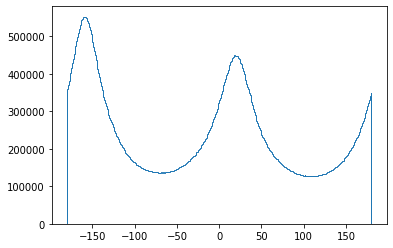

In [30]:
discindx=(mass<1e-7*2.324876e9)
barsample=(r<3)*discindx
counts, bins, patches=plt.hist(phi[barsample],bins=360,histtype='step')
bin_centres=bins[:-1]+(bins[1]-bins[0])/2
max_indx=np.argmax(counts)
barangle_degrees=bin_centres[max_indx]
print(barangle_degrees)

# we always want the bar to be at 25 degrees from the observer

In [31]:
rotation_angle=25-barangle_degrees
rot_angle_radians=np.deg2rad(rotation_angle)
x_rot=x*np.cos(rot_angle_radians)-y*np.sin(rot_angle_radians) #take care of radians and degress
y_rot=x*np.sin(rot_angle_radians)+y*np.cos(rot_angle_radians)
R_rot=(x_rot**2+y_rot**2)**(1/2)
phi_rot=np.arctan2(y_rot,x_rot) #this is different from the original phi
phi_rot=np.rad2deg(phi_rot)

Plot generated and saved to file:  700_v_phi_vs_r_hexbin_rotated.jpg


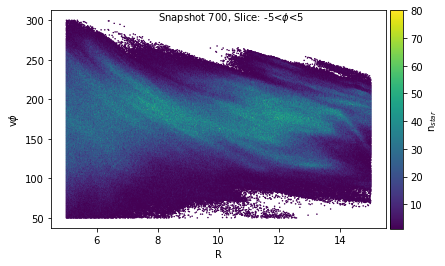

In [33]:
keep_phi=(phi_rot<5)*(phi_rot>-5)

fig2=plt.figure()
ax=fig2.add_subplot(111)
ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
cb1=ax.hexbin(r[keep_phi],vphi[keep_phi],extent=((5,15,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=80)
ax.set_xlabel("R")
ax.set_ylabel(r"v$\phi$")
cbar_ax = fig2.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig2.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"_v_phi_vs_r_hexbin_rotated.jpg"
plotpath2="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/plots/v_phi_vs_r/"
#fig2.savefig(plotpath2+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)

Plot generated and saved to file:  700x_rot_vs_y_rot_all.jpg


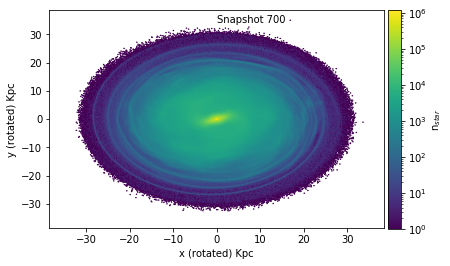

In [32]:
#figure3: ROTATED x vs y plot of the entire galaxy6
fig3=plt.figure()
ax=fig3.add_subplot(111)
ax.text(0,34,r"Snapshot %s "%(str(snapshot)))
cb1=ax.hexbin(x_rot,y_rot,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,bins="log")
ax.set_xlabel("x (rotated) Kpc")
ax.set_ylabel("y (rotated) Kpc")
cbar_ax = fig3.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig3.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"x_rot_vs_y_rot_all.jpg"
plotpath3="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/plots/y_vs_x_rotated/"

#fig3.savefig(plotpath3+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)


In [ ]:
#figure4: x_rot_select=x_rot[keep_phi], y_rot_select=y_rot[keep_phi] (ROTATED x and y of the slected region)
fig4=plt.figure()
ax4=fig4.add_subplot(111)
ax4.text(5,3,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#print("These are the rotated x and y ",x_rot[keep_phi])
#ax.plot(x,y)
x_rot_select=x_rot[keep_phi]
y_rot_select=y_rot[keep_phi]

cb4=ax4.hexbin(x_rot_select,y_rot_select,extent=((-1,35,-3,3)),gridsize=500,mincnt=1,bins="log")
ax4.set_xlabel("x")
ax4.set_ylabel("y")
cbar_ax4 = fig4.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig4.colorbar(cb4, cax=cbar_ax4)
cbar_ax4.set_ylabel(r'n$_{star}$')
cbar_ax4.yaxis.label.set_size(10)
plotname=str(snapshot)+"x_rot_vs_y_rot_selected_region.jpg"
plotpath4="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/plots/y_vs_x_sliced/"

#fig4.savefig(plotpath4+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)

Plot generated and saved to file:  700_v_phi_vs_vr_hexbin_rotated.jpg


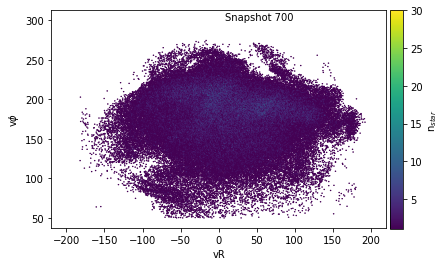

In [34]:
fig5=plt.figure()
ax5=fig5.add_subplot(111)
keep=(x_rot<8.5)*(x_rot>7.5)*(y_rot>-0.5)*(y_rot<0.5)*(z>-0.5)*(z<0.5)
vphi_select=vphi[keep]
vr_select=vr[keep]
ax5.text(8,300,r"Snapshot %s "%(str(snapshot)))
cb5=ax5.hexbin(vr_select,vphi_select,extent=((-200,200,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=30)
ax5.set_xlabel("vR")
ax5.set_ylabel(r"v$\phi$")
cbar_ax5 = fig5.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig5.colorbar(cb5, cax=cbar_ax5)
cbar_ax5.set_ylabel(r'n$_{star}$')
cbar_ax5.yaxis.label.set_size(10)
plotname=str(snapshot)+"_v_phi_vs_vr_hexbin_rotated.jpg"
plotpath5="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/plots/v_phi_vs_vr/"

#fig5.savefig(plotpath5+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)

#with open(local_datapath+filename, 'wb') as output:
#  pickle.dump(data, output)

In [22]:
print(len(snaparr['x']))

276078080
